Reza Ehsani - Amirhossein Zargarnejad - Masoumeh Goudarzi - Sarvenaz Daryaei

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

serif_font = {'fontname':'serif'}

df_bac = pd.read_csv('data/bacteries.csv')
df_bac.head()

,Bacteria,Penicilin,Streptomycin,Neomycin,Gram_Stain
0,Aerobacter aerogenes,870.000,1.00,1.600,negative
1,Brucella abortus,1.000,2.00,0.020,negative
2,Bricella anthracis,0.001,0.01,0.007,positive
3,Diplococcus pneumoniae,0.005,11.00,10.000,positive
4,Escherichia coli,100.000,0.40,0.100,negative


Text(16.5, 1, '(-) : Negative gram staining')

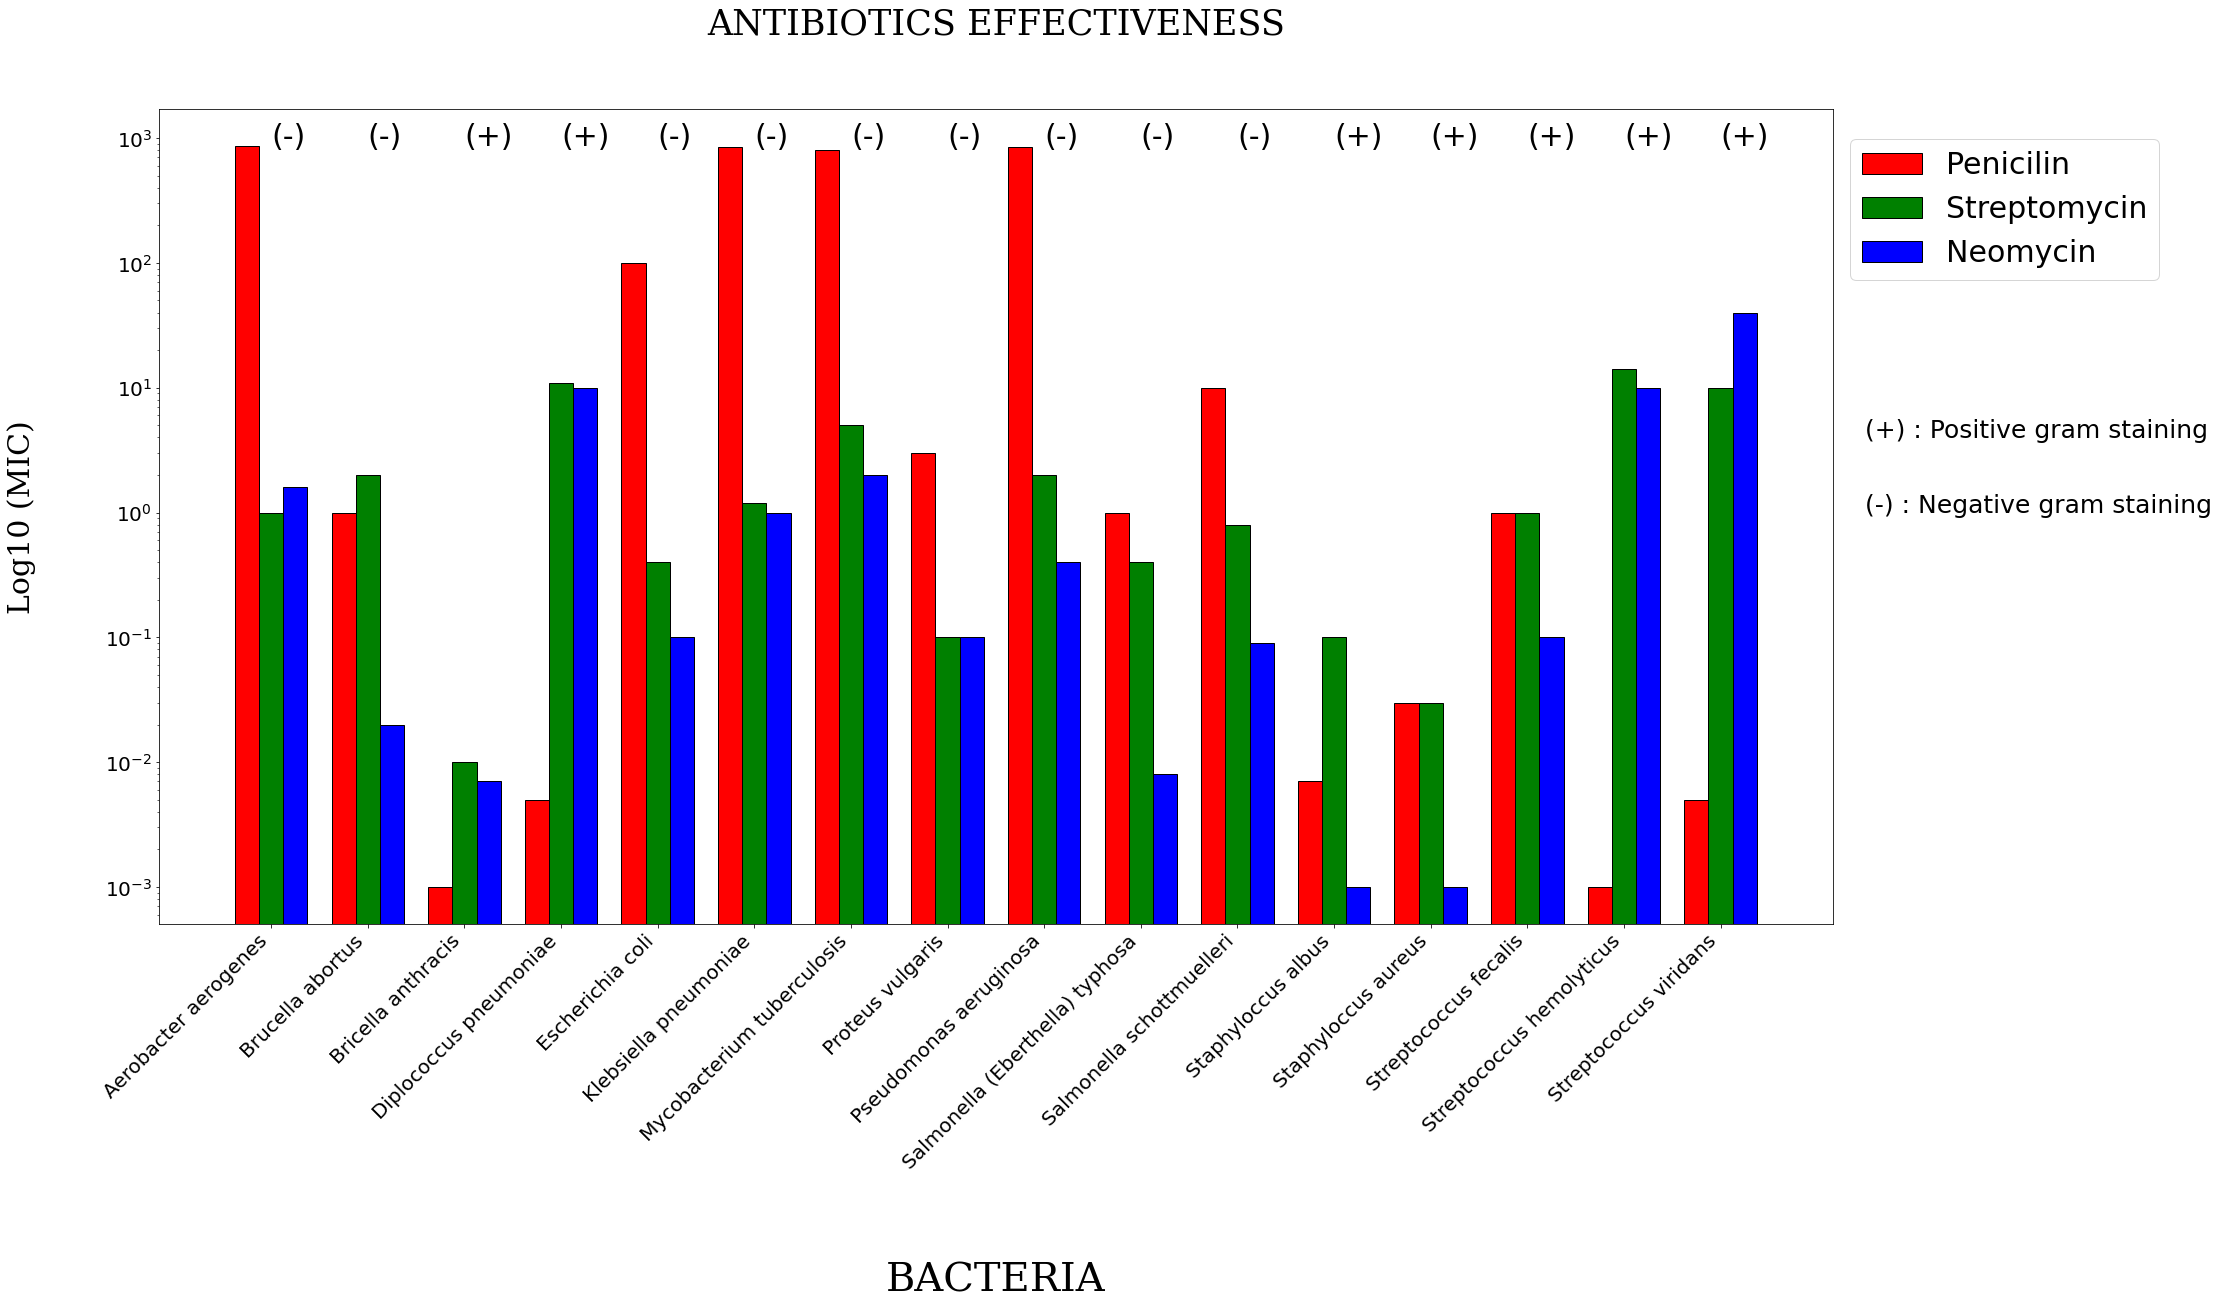

In [30]:
#Adjustment of the figure
plt.figure(figsize=(30, 15))

#Plotting three bar chart in a figure for each antibiotic
width = 0.25   #the width of bars
x_axis = np.arange(len(df_bac['Bacteria']))
plt.bar(x_axis - width, df_bac['Penicilin'], width = width, label = 'Penicilin', color = 'red', ec = 'black')
plt.bar(x_axis , df_bac['Streptomycin'], width = width, label = 'Streptomycin', color = 'green', ec = 'black')
plt.bar(x_axis + width, df_bac['Neomycin'], width = width, label = 'Neomycin', color = 'blue', ec = 'black')

#Scaling the y-axis with logarithm
plt.yscale('log')

#Putting legend 
plt.legend(loc = (1.01,0.79), fontsize = 30)

#Putting the labels and ticks
plt.xticks(x_axis, df_bac['Bacteria'], rotation=45, ha='right', size = 20)
plt.yticks(size  = 20)
plt.xlabel('\n\nBACTERIA',
           **serif_font, size  = 40)
plt.ylabel('Log10 (MIC)\n\n', 
           **serif_font, size  = 30)

#Show the title of the figure
plt.title('ANTIBIOTICS EFFECTIVENESS',
          **serif_font, fontsize = 35, pad = 75)

#Adding the gram staining to the chart
l=[]
for i in df_bac.index:
    if df_bac['Gram_Stain'][i]=='positive':
        l.append('(+)')
    else:
        l.append('(-)')

for i in df_bac.index:
    plt.text(i, df_bac['Penicilin'][0], l[i], fontsize = 30)

plt.text(16.5, 4, '(+) : Positive gram staining', fontsize = 25)
plt.text(16.5, 1, '(-) : Negative gram staining', fontsize = 25)

# Scattered 

Text(0.5, 1.0, 'EFFECTIVENESS of POPULAR ANTIBIOTICS AGAINST VARIOUS BACTERIA')

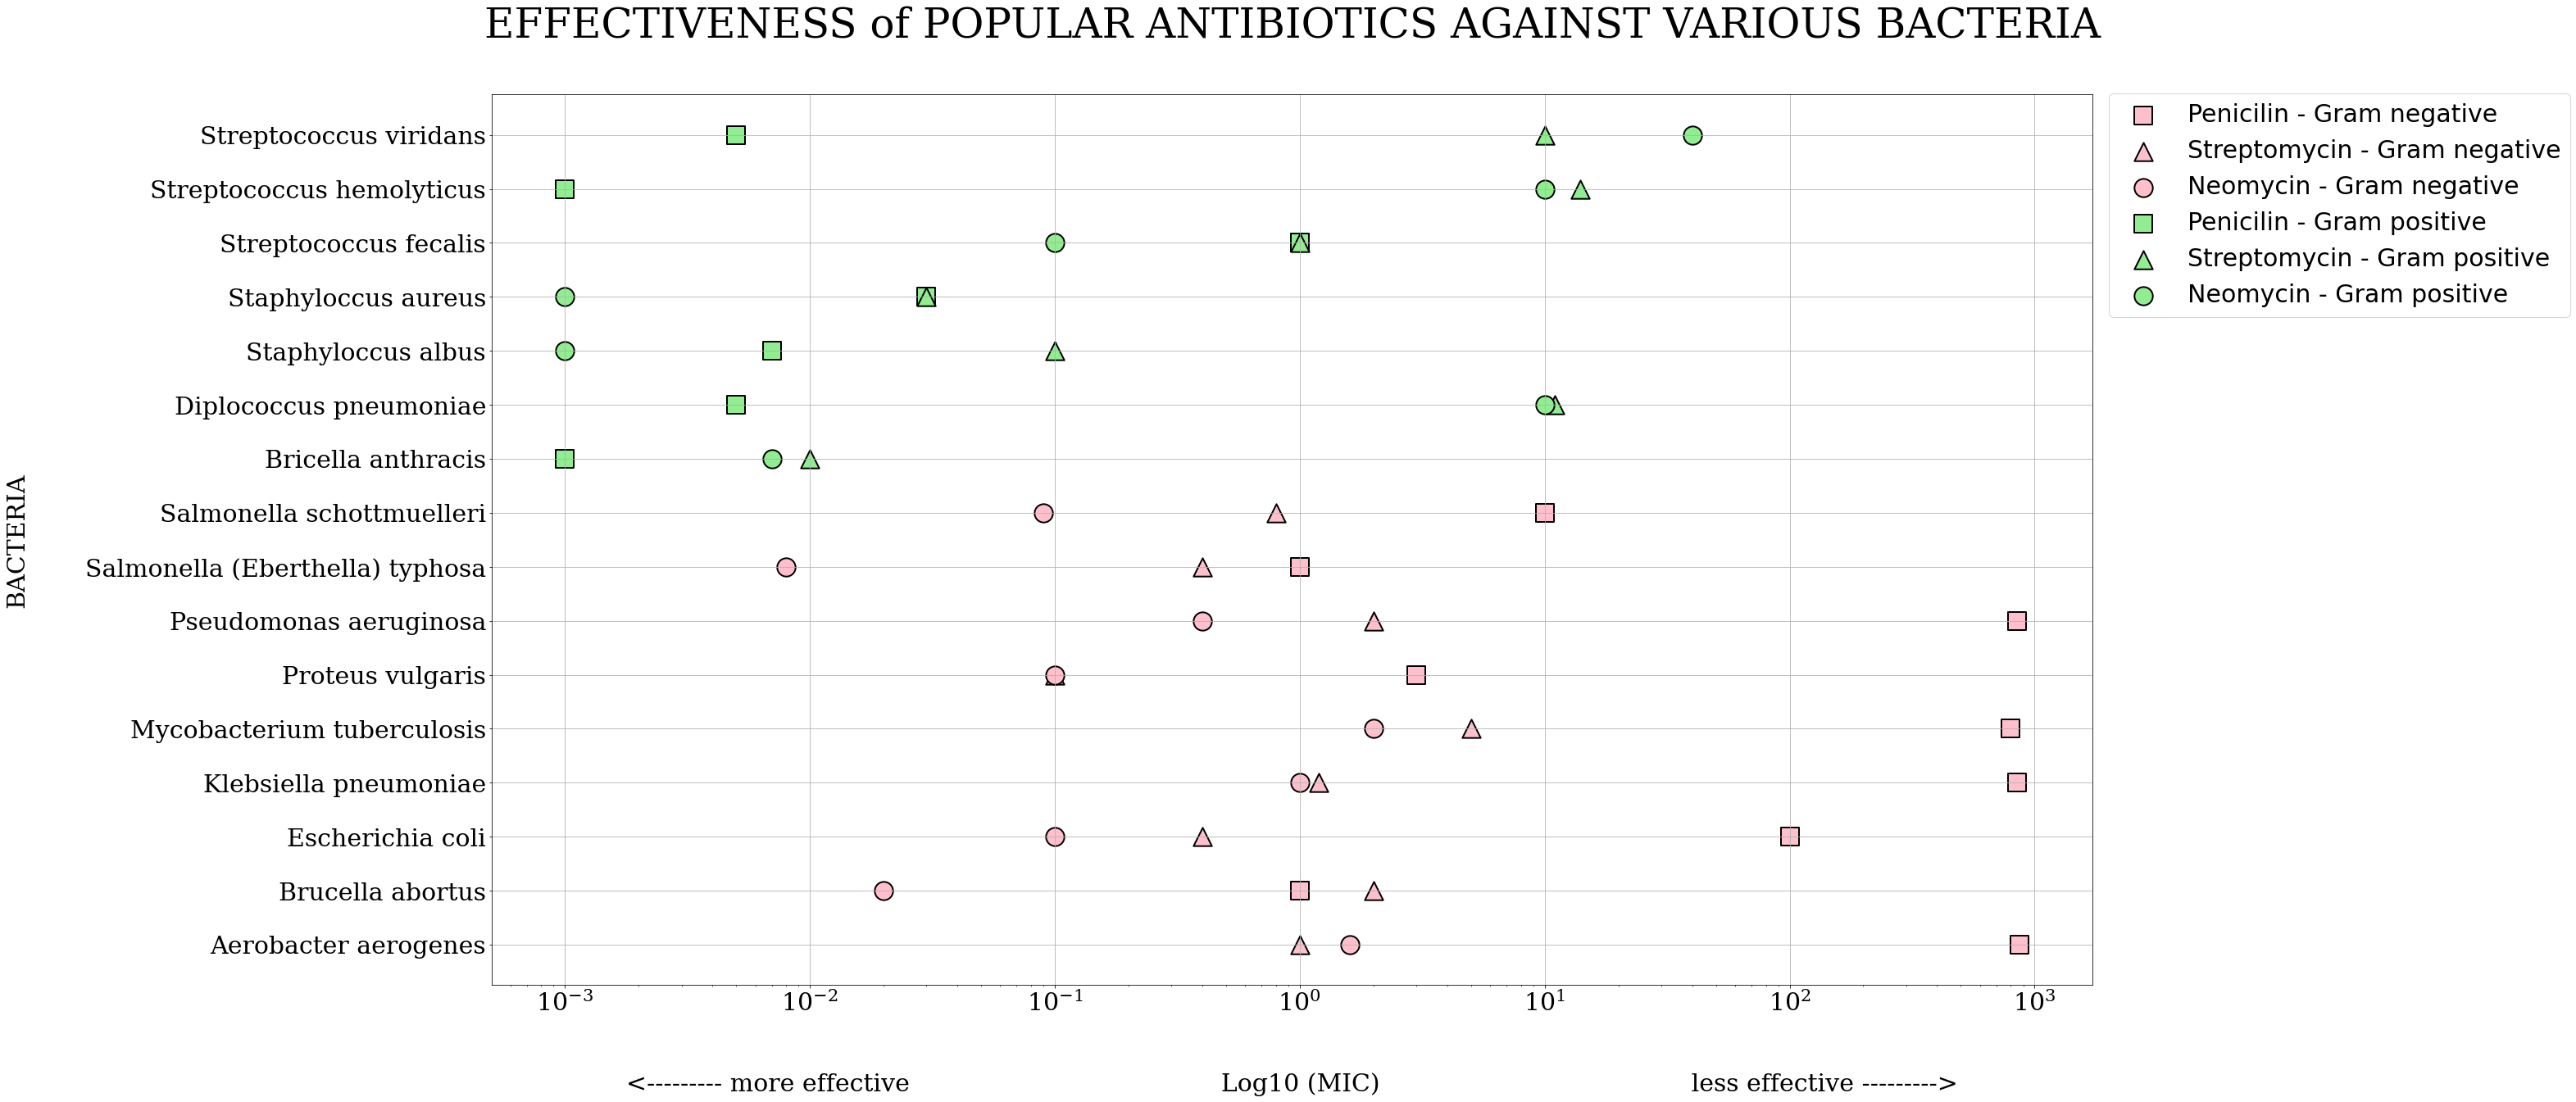

In [3]:
plt.figure(figsize=(35, 20))

#Filtering the positive and negative gram staining to plot them seprately on one figure
df_pos = df_bac[df_bac['Gram_Stain'] == 'positive']
df_neg = df_bac[df_bac['Gram_Stain'] == 'negative']


#Plotting the antibiotics with negative gram staining
plt.scatter(data = df_neg,
            x = "Penicilin", y = "Bacteria",
            label = "Penicilin - Gram negative",
            linewidths = 2, 
            color = 'pink', marker = 's',
            edgecolor = 'black', s = 500)

plt.scatter(data = df_neg,
            x = "Streptomycin", y = "Bacteria",
            label = "Streptomycin - Gram negative",
            linewidths = 2, 
            color = 'pink', marker = '^',
            edgecolor = 'black', s = 500)

plt.scatter(data = df_neg,
            x = "Neomycin", y = "Bacteria",
            label = "Neomycin - Gram negative",
            linewidths = 2, 
            color = 'pink',
            edgecolor = 'black', s = 500)

#Plotting the antibiotics with positive gram staining
plt.scatter(data = df_pos,
            x = "Penicilin", y = "Bacteria",
            label = "Penicilin - Gram positive",
            linewidths = 2, 
            color = 'lightgreen', marker = 's',
            edgecolor = 'black', s = 500)

plt.scatter(data = df_pos,
            x = "Streptomycin", y = "Bacteria",
            label = "Streptomycin - Gram positive",
            linewidths = 2,  
            color = 'lightgreen', marker = '^',
            edgecolor = 'black', s = 500)

plt.scatter(data = df_pos,
            x = "Neomycin", y = "Bacteria",
            label = "Neomycin - Gram positive",
            linewidths = 2,  
            color = 'lightgreen',
            edgecolor = 'black', s = 500)


#Using logarithm scale for the X axis
plt.xscale('log')

#Adjusting the labels on the axis
plt.xticks(**serif_font, size  = 30)
plt.yticks(**serif_font, size = 30)
plt.xlabel('\n\n<--------- more effective' + ' '*40 + 'Log10 (MIC)' + ' '*40 + 'less effective --------->',
           **serif_font, size  = 30)
plt.ylabel('BACTERIA\n\n', 
           **serif_font, size  = 30)

plt.grid()

plt.legend(loc = (1.01,0.75), fontsize = 30)

plt.title('EFFECTIVENESS of POPULAR ANTIBIOTICS AGAINST VARIOUS BACTERIA',
          **serif_font, fontsize = 50, pad = 70)

# circle heatmap

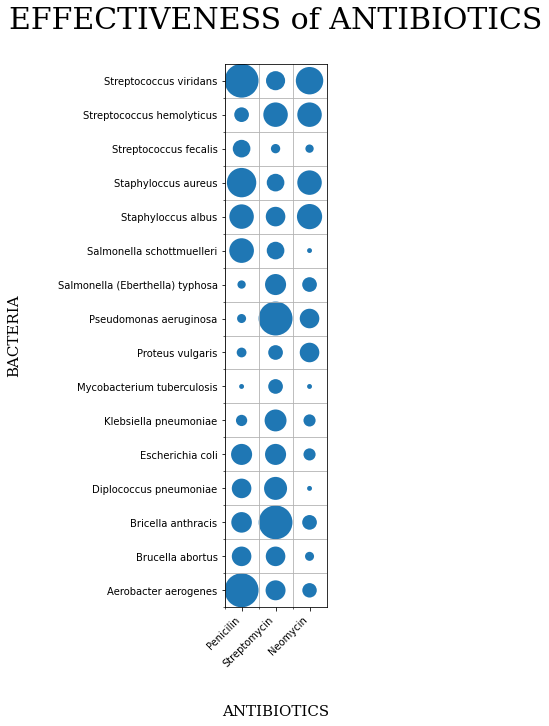

In [11]:
from matplotlib.collections import PatchCollection
import math

CC = df_bac[['Penicilin', 'Streptomycin', 'Neomycin']]
CC1 = CC.values.tolist()
CC2 = np.array(CC1)


#retrieve unique labels
ylabels = df_bac["Bacteria"]
xlabels = antibiotics
xn = len(xlabels)
yn = len(ylabels)

#Scaling data and store in 2D array
R_flat = np.array(CC2).flatten()


for i in range(len(R_flat)):
    R_flat[i] = math.log10(R_flat[i]) + 4

R = R_flat/R_flat.max()/2


#preparation of the figure with its grid
fig, ax = plt.subplots(figsize=(20,10))

ax.set_xlim(-0.5, xn-0.5)
ax.set_ylim(-0.5, yn-0.5)

ax.set(xticks=np.arange(xn), yticks=np.arange(yn), xticklabels=xlabels, yticklabels=ylabels)

ax.set_xticks(np.arange(xn)-0.5, minor=True)
ax.set_yticks(np.arange(yn)-0.5, minor=True)

ax.grid(which='minor')

#ensure circles are displayed as circles
ax.set_aspect("equal", "box")


x, y = np.meshgrid(np.arange(xn), np.arange(yn), indexing = "ij")


Circles = [plt.Circle((i,j), r) for r, i, j in zip(R, x.flat, y.flat) ]
col = PatchCollection(Circles , cmap="Blues")
ax.add_collection(col)

plt.xticks(rotation=45, ha='right')

plt.xlabel('\n\nANTIBIOTICS', **serif_font, size  = 15)
plt.ylabel('BACTERIA\n\n', **serif_font, size  = 15)

plt.title('EFFECTIVENESS of ANTIBIOTICS',
          **serif_font, fontsize = 30, pad = 35)

plt.show()

# Table heatmap

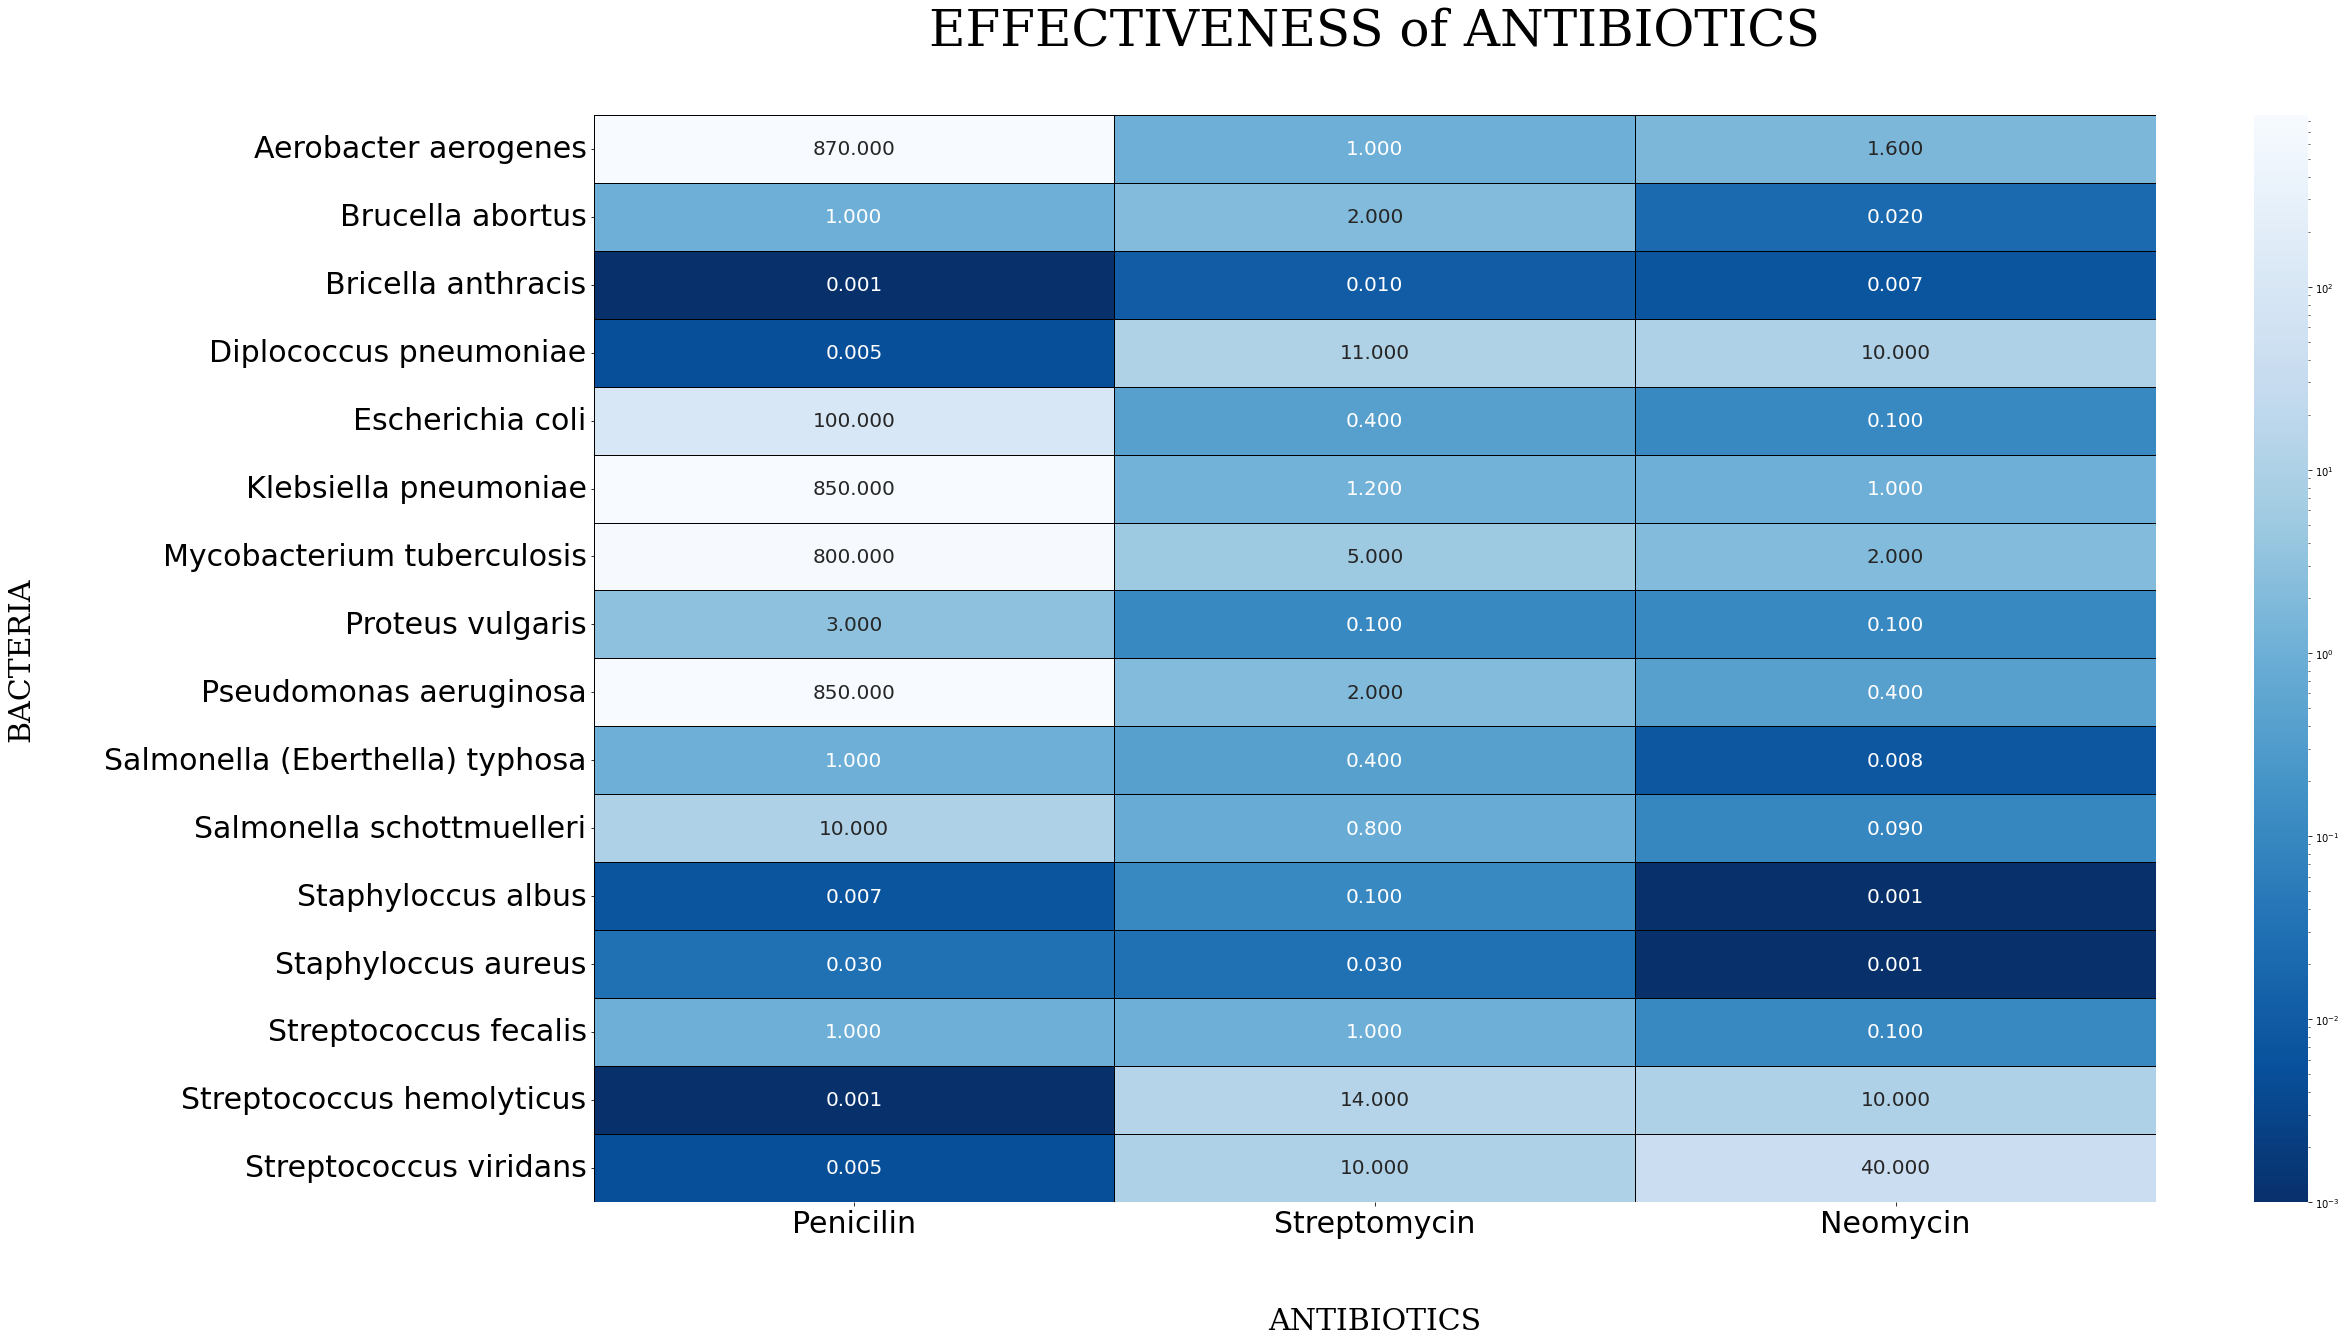

In [4]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(35, 20))

bacteries = df_bac['Bacteria']
antibiotics = ["Penicilin", "Streptomycin", "Neomycin"]

couple_columns = df_bac[['Penicilin', 'Streptomycin', 'Neomycin']]

sns.heatmap(couple_columns,
            norm=LogNorm(),
            annot = True,
            cmap = "Blues_r",
            xticklabels = antibiotics,
            yticklabels = bacteries,
            fmt = '.3f',
            linewidths = 1,
            linecolor = 'black',
            cbar_kws={"shrink": 1},
            annot_kws = {"size": 20}
            ) 

plt.xticks(size  = 30)
plt.yticks(ha='right', size = 30)
plt.xlabel('\n\nANTIBIOTICS', **serif_font, size  = 30)
plt.ylabel('BACTERIA\n\n', **serif_font, size  = 30)

plt.title('EFFECTIVENESS of ANTIBIOTICS',
          **serif_font, fontsize = 50, pad = 70)
plt.show()